<a href="https://colab.research.google.com/github/polaabhiram/ML/blob/main/ML_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble learning


In [8]:
#Simple ensemble techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()

hard_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='hard'
)

hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

soft_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='soft'
)

soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_test)

print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))


Hard Voting Accuracy: 1.0
Soft Voting Accuracy: 1.0


Accuracy: 1.0
Number of estimators: 1
Accuracy: 1.0
Number of estimators: 5
Accuracy: 1.0
Number of estimators: 10
Accuracy: 1.0
Number of estimators: 50
Accuracy: 1.0
Number of estimators: 100
Accuracy: 1.0
Number of estimators: 150
Accuracy: 1.0


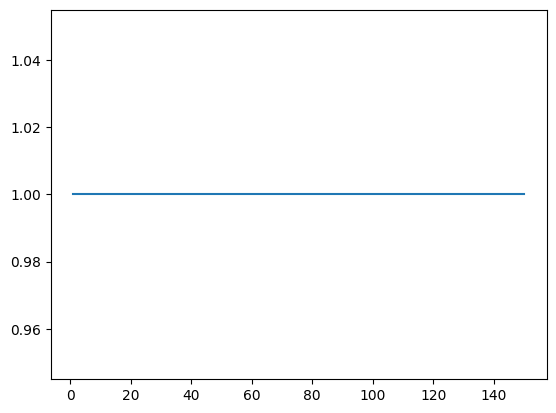

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def print_metrics(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test,y_pred))
  return accuracy_score(y_test,y_pred)
iris=load_iris()
x,y=iris.data,iris.target

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

clf1=DecisionTreeClassifier(random_state=42)
clf1.fit(x_train,y_train)

y_pred=clf1.predict(x_test)
print_metrics(y_test,y_pred)



n_estimators_list = [1, 5, 10, 50, 100,150]
acc=[]

for estimators in n_estimators_list:
    clf=RandomForestClassifier(n_estimators=estimators,random_state=42)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)

    print("Number of estimators:",estimators)
    score=print_metrics(y_test,y_pred)
    acc.append(score)

plt.plot(n_estimators_list,acc)
plt.show()

Decision Tree
Accuracy: 0.8425925925925926
Number of estimators: 1
Accuracy: 0.7574074074074074
Number of estimators: 3
Accuracy: 0.8592592592592593
Number of estimators: 5
Accuracy: 0.9203703703703704
Number of estimators: 10
Accuracy: 0.9444444444444444
Number of estimators: 20
Accuracy: 0.9648148148148148
Number of estimators: 50
Accuracy: 0.9740740740740741
Number of estimators: 100
Accuracy: 0.975925925925926
Number of estimators: 150
Accuracy: 0.9722222222222222
Number of estimators: 200
Accuracy: 0.9722222222222222


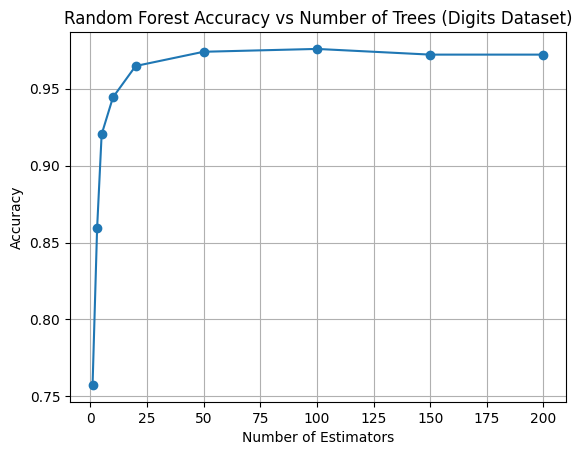

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def print_metrics(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

# Load digits dataset
data = load_digits()
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Decision Tree baseline
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print("Decision Tree")
print_metrics(y_test, y_pred)

n_estimators_list = [1, 3, 5, 10, 20, 50, 100, 150, 200]
acc = []

for estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=estimators, random_state=42)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print(f"Number of estimators: {estimators}")
    score = print_metrics(y_test, y_pred)
    acc.append(score)

plt.plot(n_estimators_list, acc, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees (Digits Dataset)")
plt.grid(True)
plt.show()


In [ ]:
#MaxVoting
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic features for 3 classes (Dog=0, Cat=1, Bird=2)
n_samples = 100

# Class 0: Dog (feature means around 5, 3, 1.5, 0.3)
dog_features = np.random.normal(loc=[5, 3, 1.5, 0.3], scale=0.5, size=(n_samples//3, 4))

# Class 1: Cat (feature means around 6, 3, 4.5, 1.5)
cat_features = np.random.normal(loc=[6, 3, 4.5, 1.5], scale=0.5, size=(n_samples//3, 4))

# Class 2: Bird (feature means around 7, 3, 6, 2)
bird_features = np.random.normal(loc=[7, 3, 6, 2], scale=0.5, size=(n_samples//3, 4))

X = np.vstack((dog_features, cat_features, bird_features))
y = np.array([0]*(n_samples//3) + [1]*(n_samples//3) + [2]*(n_samples//3))

df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df['Label'] = y

print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(probability=False, random_state=42)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)

predictions = np.vstack((pred1, pred2, pred3))
final_pred, _ = mode(predictions, axis=0)


print("Decision Tree Accuracy:", accuracy_score(y_test, pred1))
print("KNN Accuracy:", accuracy_score(y_test, pred2))
print("SVM Accuracy:", accuracy_score(y_test, pred3))
print("Max Voting Ensemble Accuracy:", accuracy_score(y_test, final_pred.ravel()))


   Feature1  Feature2  Feature3  Feature4  Label
0  5.248357  2.930868  1.823844  1.061515      0
1  4.882923  2.882932  2.289606  0.683717      0
2  4.765263  3.271280  1.268291  0.067135      0
3  5.120981  2.043360  0.637541  0.018856      0
4  4.493584  3.157124  1.045988 -0.406152      0
Decision Tree Accuracy: 0.95
KNN Accuracy: 0.95
SVM Accuracy: 0.95
Max Voting Ensemble Accuracy: 0.95
